# CNN Evaluation

From our paper on "Explainable Prediction of Acute Myocardial Infarction using Machine Learning and Shapley Values"

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import pylab as plt
from keras import optimizers, losses, activations, models, regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, Flatten, GlobalMaxPool1D, GlobalAveragePooling1D, \
    concatenate
from keras.utils import to_categorical
from keras.models import load_model, Sequential
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns
import time

Using TensorFlow backend.


# Loading Data

In [2]:
# Load data
# Import train and test data into dataframes from csv files produced using the data processing code
df_cnn_train = pd.read_csv("train.csv", header=None)
df_cnn_train = df_cnn_train.sample(frac=1)
df_cnn_test = pd.read_csv("test.csv", header=None)

In [3]:
# Get data from dataframes
y_cnn = np.array(df_cnn_train[11].values).astype(np.int8)
y_cnn=to_categorical(y_cnn)
x_cnn = np.array(df_cnn_train[list(range(11))].values)[..., np.newaxis]
y_cnn_test = np.array(df_cnn_test[11].values).astype(np.int8)
x_cnn_test = np.array(df_cnn_test[list(range(11))].values)[..., np.newaxis]

# Model Evaluation + Confusion Matrix

In [4]:
start_time = time.time()

model = load_model('cnn_ecgview.h5')

y_pred = model.predict(x_cnn_test)
y_pred = np.argmax(y_pred, axis=-1)

print("--- inference time of %s seconds ---" % (time.time() - start_time))

# Get F1 score
f1 = f1_score(y_cnn_test, y_pred, average="macro")
print("Test f1 score : %s "% f1)

# Get ROC AUC
roc = roc_auc_score(y_cnn_test, y_pred)
print("Test ROC AUC score : %s "% roc)

# Get the accuracy
acc = accuracy_score(y_cnn_test, y_pred)
print("Test accuracy score : %s "% acc)

# Get the specificity
tn, fp, fn, tp = confusion_matrix(y_cnn_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("Specificity : %s "% specificity)

# Get the sensitivity
sensitivity= tp / (tp+fn)
print("Sensitivity: %s "% sensitivity)

--- inference time of 4.2053492069244385 seconds ---
Test f1 score : 0.8897116611957949 
Test ROC AUC score : 0.9067596249046469 
Test accuracy score : 0.8982110100417935 
Specificity : 0.8811916268654602 
Sensitivity: 0.9323276229438336 


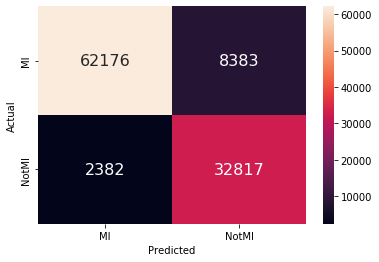

In [6]:
# Get the confusion matrix
confusion = confusion_matrix(y_cnn_test, y_pred)
sns.heatmap(data=confusion, annot=True, xticklabels=["MI", "NotMI"], yticklabels=["MI", "NotMI"], fmt = "d", annot_kws={"fontsize":16})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.yticks(va="center")
plt.show()

In [1]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
